In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
import plotly.express as px
import scipy
from skimage import (
    color, filters, exposure, measure, morphology, transform, util)
from segmentflow import segment, view
%load_ext autoreload
%autoreload 2

## Load images

Loading images...
--> Images loaded as 3D array:  (2187, 1691, 1596)
--> Plotting images: [250, 500, 750]


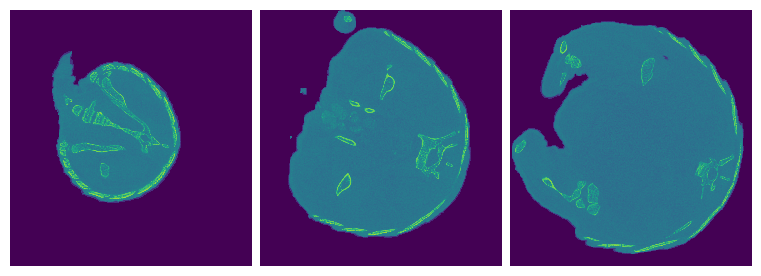

In [2]:
imgs_path = Path('armadillo-UF20650')
slices = [250, 500, 750]
# imgs = segment.load_images(
#     imgs_path,
#     slice_crop=None,
#     file_suffix='.tif'
# )
imgs = transform.rescale(imgs, 0.5, anti_aliasing=True)
fig, axes = view.plot_slices(
    imgs,
    slices=slices,
    print_slices=True,
    imgs_per_row=None,
    fig_w=7.5,
    dpi=100
)

In [3]:
preview_rescale = False
if preview_rescale:
    imgs_med = segment.preprocess(imgs, median_filter=True)
    med_hist, med_bins_centers = exposure.histogram(imgs_med)
    fig, ax = plt.subplots()
    ax.plot(med_bins_centers, med_hist)
    lo = np.percentile(imgs_med, 25.5)
    hi = np.percentile(imgs_med, 99.98)
    fig, ax = plt.subplots()
    ax.plot(med_bins_centers, med_hist)
    ax.axvline(lo, c='red')
    ax.axvline(hi, c='red')
    plt.show()

## Rescale intensity

Preprocessing images...
--> Applying median filter...
--> Rescaling intensities to percentile range [25.5, 99.98]...
--> Preprocessing complete.
Plotting images: [250, 500, 750]


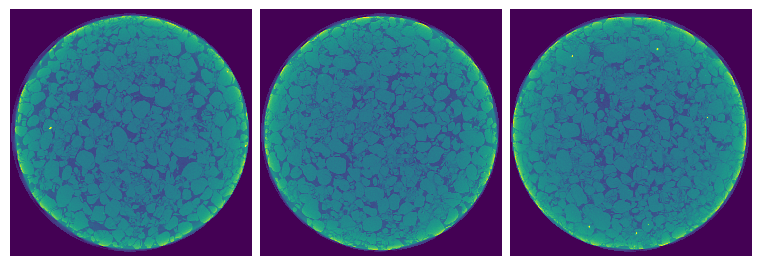

In [4]:
imgs_med = None
imgs_pre = segment.preprocess(
    imgs, median_filter=True, rescale_intensity_range=[25.5, 99.98])
fig, axes = view.plot_slices(
    imgs_pre,
    slices=slices,
    print_slices=True,
    imgs_per_row=None,
    fig_w=7.5,
    dpi=100
)

In [5]:
# segment.save_images(imgs_med, Path('../data/F83_01_pre'))

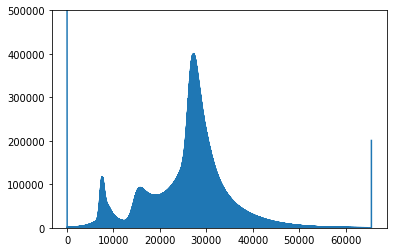

In [6]:
hist, bins_centers = exposure.histogram(imgs_pre)
fig, ax = plt.subplots()
ax.plot(bins_centers, hist)
ax.set_ylim([0, 5e5])
plt.show()

Calculating thresholds from local minima...
--> 3 peak(s) found: [7808, 16256, 27520]
--> 2 minima found: [11904, 19072]


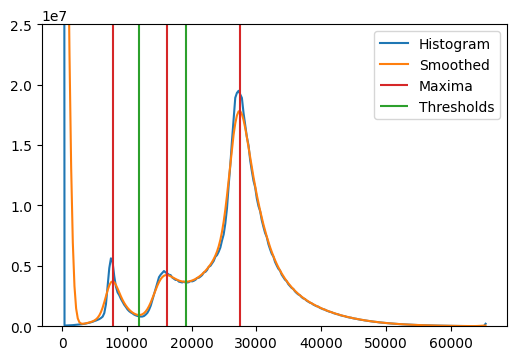

In [7]:
thresholds, fig, ax = segment.threshold_multi_min(
    imgs_pre, nbins=256, nthresholds='all', return_fig_ax=True,
    ylims=[0, 2.5e7], plt_kwargs={'dpi': 100})
plt.show()

## Failed semantic seg

Plotting images: [250, 500, 750]


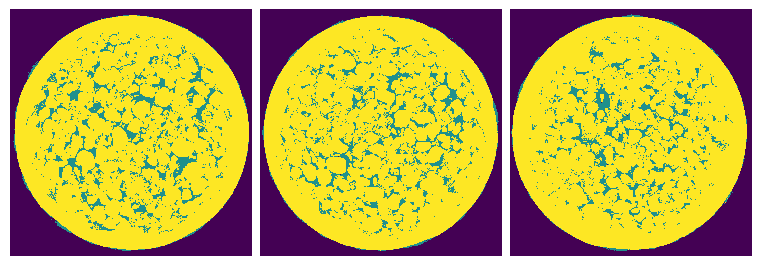

imgs_semantic = 0


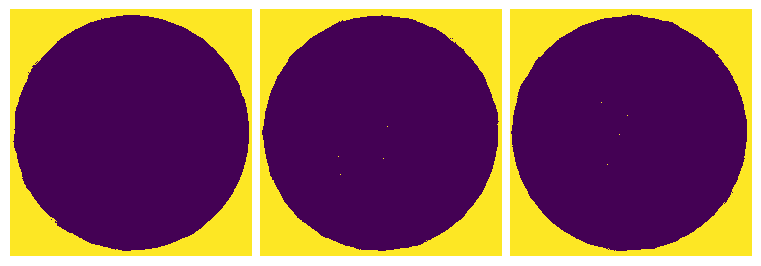

imgs_semantic = 1


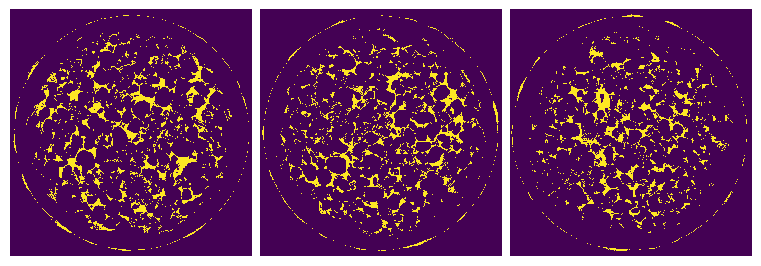

imgs_semantic = 2


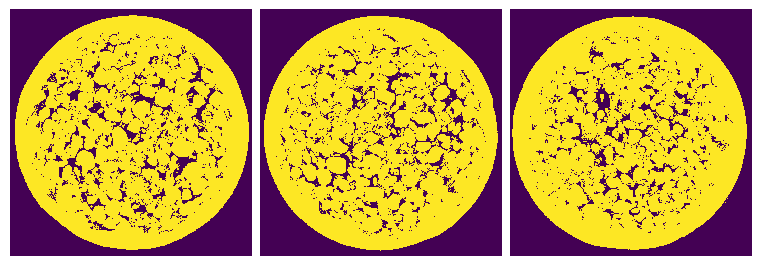

In [8]:
imgs_semantic = segment.isolate_classes(imgs_pre, thresholds)
fig, axes = view.plot_slices(imgs_semantic, slices=slices)
plt.show()
for i in range(len(thresholds) + 1):
    print('imgs_semantic =', i)
    fig, axes = view.plot_slices(
        imgs_semantic==i,
        slices=slices,
        print_slices=False,
        fig_w=7.5,
        dpi=100
    )
    plt.show()

Segmenting images...
--> Number of particle(s) before border exclusion:  16526
--> Excluding border particles...
--> Segmentation complete. 15662 particle(s) segmented.


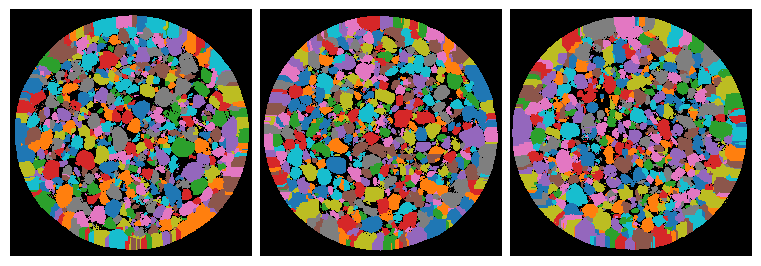

In [9]:
imgs = None
imgs_med = None
imgs_res = None
imgs_labeled = segment.watershed_segment(
    imgs_semantic==len(thresholds),
    min_peak_distance=6,
    exclude_borders=True,
    return_dict=False
)
fig, axes = view.plot_color_labels(
    imgs_labeled,
    slices=slices,
    fig_w=7.5,
    dpi=100
)

In [25]:
imgs_labeled_unique = np.unique(imgs_labeled)
print(f'{imgs_labeled_unique.shape=}')
print(f'{imgs_labeled_unique[:10]=}')

imgs_labeled_unique.shape=(15663,)
imgs_labeled_unique[:10]=array([  0, 645, 646, 647, 651, 652, 653, 654, 655, 656], dtype=uint16)


In [10]:
merged_labels_dir_path = Path('../results/F83_01_merged_labels')
imgs_merged = segment.merge_segmentations(imgs_semantic, imgs_labeled)
segment.save_images(imgs_merged, merged_labels_dir_path)

996 image(s) saved to: C:\Users\gusb\Research\mhe-analysis\nbs\results\F83_01_merged_labels


Loading images...
--> Images loaded as 3D array:  (996, 1014, 994)


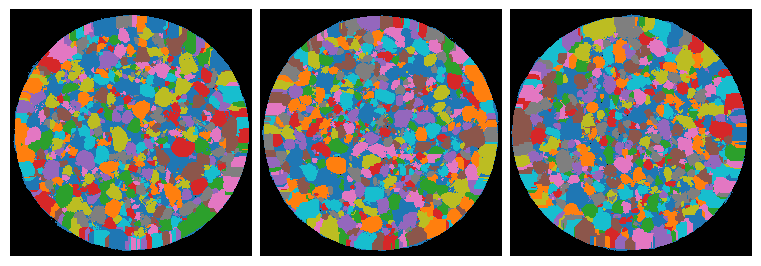

In [29]:
merged_labels_dir_path = Path('C:/Users/gusb/Documents/00-research-docs/F83_01_merged_labels')
imgs_merged = segment.load_images(merged_labels_dir_path, file_suffix='.tif')
fig, axes = view.plot_color_labels(
    imgs_merged,
    slices=slices,
    fig_w=7.5,
    dpi=100
)
plt.show()

In [30]:
imgs_merged_unique = np.unique(imgs_merged)
print(f'{imgs_merged_unique.shape=}')
print(f'{imgs_merged_unique[:10]=}')
print(f'{imgs_merged_unique[-1]=}')

imgs_merged_unique.shape=(15664,)
imgs_merged_unique[:10]=array([  0,   1, 645, 646, 647, 651, 652, 653, 654, 655], dtype=uint16)
imgs_merged_unique[-1]=16526
